In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import StackingClassifier , RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [204]:
df = pd.read_csv("C:/Users/himan/Downloads/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


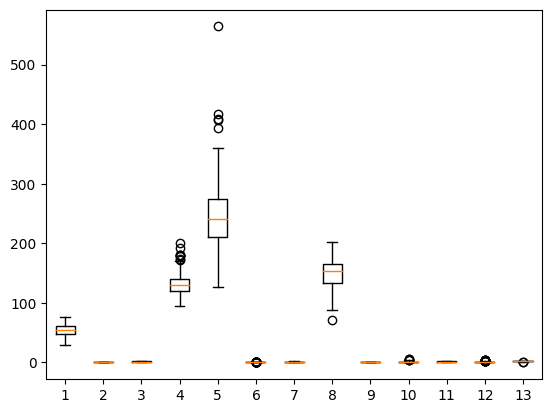

In [228]:
plt.boxplot(X)
plt.show()

In [206]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [207]:
df.shape

(303, 14)

In [208]:
X = df.drop(columns=['target'])
y = df['target']

In [209]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [210]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [211]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

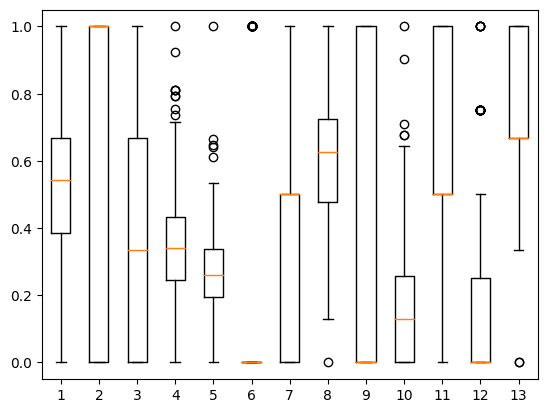

In [212]:
plt.boxplot(X_scaled)
plt.show()

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.2,random_state=42)

In [215]:
## define base models
#gd = GradientBoostingClassifier()
knn=KNeighborsClassifier()
dt= DecisionTreeClassifier(max_depth=2) # max depth 2
rf = RandomForestClassifier(n_estimators=10, random_state=42)
gd = GradientBoostingClassifier(n_estimators=60 )



In [216]:
gd_params = {'n_estimators':[10,15],
             'criterion':['friedman_mse', 'squared_error']}
dt_params = {'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
rf_params = {'n_estimators': [100, 200, 500],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}
knn_params = {'n_neighbors':[5,10,15,20]}
              
              

In [217]:
# Define the k-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [218]:
gd_gs = GridSearchCV(gd, gd_params, cv=kf, scoring='neg_mean_squared_error')
dt_gs = GridSearchCV(dt, dt_params, cv=kf, scoring='neg_mean_squared_error')
rf_gs = GridSearchCV(rf, rf_params, cv=kf, scoring='neg_mean_squared_error')
knn_gs = GridSearchCV(knn, knn_params, cv=kf, scoring='neg_mean_squared_error')


In [219]:
# Fit the base models with hyperparameter tuning on the training data
gd_gs.fit(X_train, y_train)
dt_gs.fit(X_train, y_train)
rf_gs.fit(X_train, y_train)
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [220]:
# Make predictions on the test data using the best hyperparameters for each base model
gd_pred = gd_gs.predict(X_test)
dt_pred = dt_gs.predict(X_test)
rf_pred = rf_gs.predict(X_test)
knn_pred = knn_gs.predict(X_test)

In [221]:
# Evaluate the performance of each base model using mean squared error
gd_r2 = r2_score(y_test, gd_pred)
gd_acc = accuracy_score(y_test, gd_pred)
gd_mae = mean_absolute_error(y_test, gd_pred)
gd_mse = mean_squared_error(y_test, gd_pred)
gd_rmse = mean_squared_error(y_test, gd_pred, squared=False)
dt_r2 = r2_score(y_test, dt_pred)
dt_acc=accuracy_score(y_test, gd_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
knn_r2  = r2_score(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)


In [222]:
print('gradientboosting R2:', gd_r2)
print('Decision Tree R2:', dt_r2)
print('Random Forest R2:', rf_r2)
print('knn r2',knn_r2)

print('gradientboosting MAE:', gd_mae)
print('Decision Tree MAE:', dt_mae)
print('Random Forest MAE:', rf_mae)
print('knn mae',knn_mse)


print('gradientboosting MSE:', gd_mse)
print("Decision Tree MSE: ", dt_mse)
print('Random Forest MSE:', rf_mse)
print('knn mse',knn_mse)

print('gradientboosting RMSE:', gd_rmse)
print('Decision Tree RMSE:', dt_rmse)
print('Random Forest RMSE:', rf_rmse)
print('knn RMSE :',knn_rmse)

print('gradientboosting acc:', gd_acc)
print('Decision Tree acc:', dt_acc)
print('Random Forest acc:', rf_acc)

print('knn acc :',knn_acc)

gradientboosting R2: -0.031493906613720535
Decision Tree R2: -0.031493906613720535
Random Forest R2: 0.2846090647679036
knn r2 0.1348760783239764
gradientboosting MAE: 0.2551440329218107
Decision Tree MAE: 0.2551440329218107
Random Forest MAE: 0.17695473251028807
knn mae 0.2139917695473251
gradientboosting MSE: 0.2551440329218107
Decision Tree MSE:  0.2551440329218107
Random Forest MSE: 0.17695473251028807
knn mse 0.2139917695473251
gradientboosting RMSE: 0.5051178406291058
Decision Tree RMSE: 0.5051178406291058
Random Forest RMSE: 0.4206598774666869
knn RMSE : 0.46259244432580726
gradientboosting acc: 0.7448559670781894
Decision Tree acc: 0.7448559670781894
Random Forest acc: 0.823045267489712
knn acc : 0.7860082304526749


In [223]:

# Build the Stacking Ensemble model using the 3 base models
#estimators=[ ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('knn', KNeighborsClassifier(n_neighbors=10))]
estimators = [('rf',rf_gs.best_estimator_),('knn',knn_gs.best_estimator_),('gd',gd_gs.best_estimator_),('dt',dt_gs.best_estimator_)]
stacked = StackingClassifier(estimators=estimators,
                            final_estimator=LogisticRegression())

In [224]:
stacked.fit(X_train,y_train)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=15)),
                               ('gd',
                                GradientBoostingClassifier(criterion='squared_error',
                                                           n_estimators=10)),
                               ('dt',
                                DecisionTreeClassifier(min_samples_split=5))],
                   final_estimator=LogisticRegression())

In [226]:
stacked_pred = stacked.predict(X_test)

In [227]:
# Evaluate the performance of the Stacking Ensemble model using mean squared error
stacked_r2 = r2_score(y_test, stacked_pred)
stacked_mae = mean_absolute_error(y_test, stacked_pred)
stacked_mse = mean_squared_error(y_test, stacked_pred)
stacked_rmse = mean_squared_error(y_test, stacked_pred, squared=False)
stacked_acc = accuracy_score(y_test,stacked_pred)
print('Stacking Ensemble R2:', stacked_r2)
print('Stacking Ensemble MAE:', stacked_mae)
print("Stacking Ensemble MSE: ", stacked_mse)
print('Stacking Ensemble RMSE:', stacked_rmse)
print('Stacking Ensemble Accuracy Score:', round((100*stacked_acc), 3))

Stacking Ensemble R2: 0.2513350677803642
Stacking Ensemble MAE: 0.18518518518518517
Stacking Ensemble MSE:  0.18518518518518517
Stacking Ensemble RMSE: 0.4303314829119352
Stacking Ensemble Accuracy Score: 81.481
